In [1]:
######################################################
#File: prob6.py
#Author: Joshua D. Rego
#Description: Multiresolution Blending using 
#             Gaussian/Laplacian Pyramids
######################################################

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipdb

In [17]:
# Set to 1 will print all levels of pyramids
debug = 0

In [18]:
def normalize(I):
    return ((I - np.amin(I))/(np.amax(I)-np.amin(I)))

In [19]:
######################################################

########## Section 6.a - Generate Gaussian and Laplacian pyramids of an image ##########

In [20]:
# Function Creates Gaussian and Laplacian Pyramids from image
def createPyr(I):
    # Create lists for Gaussian and Laplacian Pyramids
    G_pyr = []
    L_pyr = []
    # Determine length of pyramid when dividing dimension by 2 each level
    pyr_len = int(np.floor(np.log2(I.shape[0]))-1)
    
    for i in range(0,pyr_len):
        # Normalize Image between 0 and 1 for plots
        I_norm = (I - np.amin(I))/(np.amax(I)-np.amin(I))
        # Append Gaussian pyramid list with Image
        G_pyr.append(I)
        # Blur image
        I_blur = cv2.GaussianBlur(G_pyr[i], (5,5), 0)
        # Normalize between 0 and 1 for plots
        I_blur_norm = (I_blur - np.amin(I_blur))/(np.amax(I_blur)-np.amin(I_blur))
        # Find residual by subtracting Blur image from unblurred image
        L = G_pyr[i] - I_blur
        # Normalize between 0 and 1 for plots
        L_norm = (L - np.amin(L))/(np.amax(L)-np.amin(L))
        # Append Laplacian with residual image
        L_pyr.append(L)
        # Downsample by factor of 2
        I = cv2.resize(I, (G_pyr[i].shape[1]//2,G_pyr[i].shape[0]//2))
        
        if debug == 1:
            # Plot images
            fig=plt.figure(figsize=(20, 50), dpi= 80, facecolor='w', edgecolor='k')
            plt.subplot(pyr_len, 3, 1 + i * 3)
            plt.imshow(G_pyr[i])
            plt.title('Gaussian Image ' + str(G_pyr[i].shape))
            plt.subplot(pyr_len, 3, 2 + i * 3)
            plt.imshow(I_blur)
            plt.title('Image + Blur ' + str(I_blur.shape))
            plt.subplot(pyr_len, 3, 3+ i * 3)
            plt.imshow(normalize(L), 'gray')
            plt.title('Laplacian Image ' + str(L_norm.shape))
    plt.show()
    return G_pyr, L_pyr

In [21]:
# Test Pyramid on single image
img = cv2.imread('apple.jpeg')
# Convert from BGR to RGB and to double precision
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB).astype('float64')
# Map range between 0 and 1
img = img / 255
# Create pyramids
G_pyr, L_pyr = createPyr(img)

In [22]:
# Function Collapses back Pyramid to high res image
def collapsePyr(G_pyr, L_pyr):
    #Create Up Pyramid list
    up_pyr = []
    # Select lowest resolution image in existing Gaussian to begin
    im = G_pyr[len(G_pyr)-1]
    for j in range(0, len(L_pyr)-1):
        # Upsample Gaussian image to shape of Laplacian in current level
        G_exp = cv2.resize(im, (L_pyr[len(L_pyr)-j-2].shape[0:2]))
        # Normalize to plot
        G_exp_norm = (G_exp-np.amin(G_exp))/(np.amax(G_exp)-np.amin(G_exp))
        # Choose Laplacian of current level
        L = L_pyr[len(L_pyr)-j-2]
        # Normalize to plot
        L_norm = (L - np.amin(L))/(np.amax(L)-np.amin(L))
        # Add Laplacian to upsampled image to get Gaussian image at the current level
        im = G_exp + L
        # Normalize to plot
        im_norm = (im-np.amin(im))/(np.amax(im)-np.amin(im))
        # Uppend Up Pyramid list with current Gaussian
        up_pyr.append(im)

        if debug == 1:
            # Plot images
            fig=plt.figure(figsize=(20, 50), dpi= 80, facecolor='w', edgecolor='k')
            plt.subplot(len(L_pyr)-1, 3, 1 + j * 3)
            plt.imshow(normalize(G_exp))
            plt.title('Expanded Image ' + str(G_exp_norm.shape))
            plt.subplot(len(L_pyr)-1, 3, 2 + j * 3)
            plt.imshow(normalize(L))
            plt.title('Laplacian Image ' + str(L_norm.shape))
            plt.subplot(len(L_pyr)-1, 3, 3 + j * 3)
            plt.imshow(normalize(im), 'gray')
            plt.title('Gaussian Image ' + str(im_norm.shape))
    plt.show()
    return up_pyr

5114.154738964134 1.9380220461773234e-07 0.1785356504913957


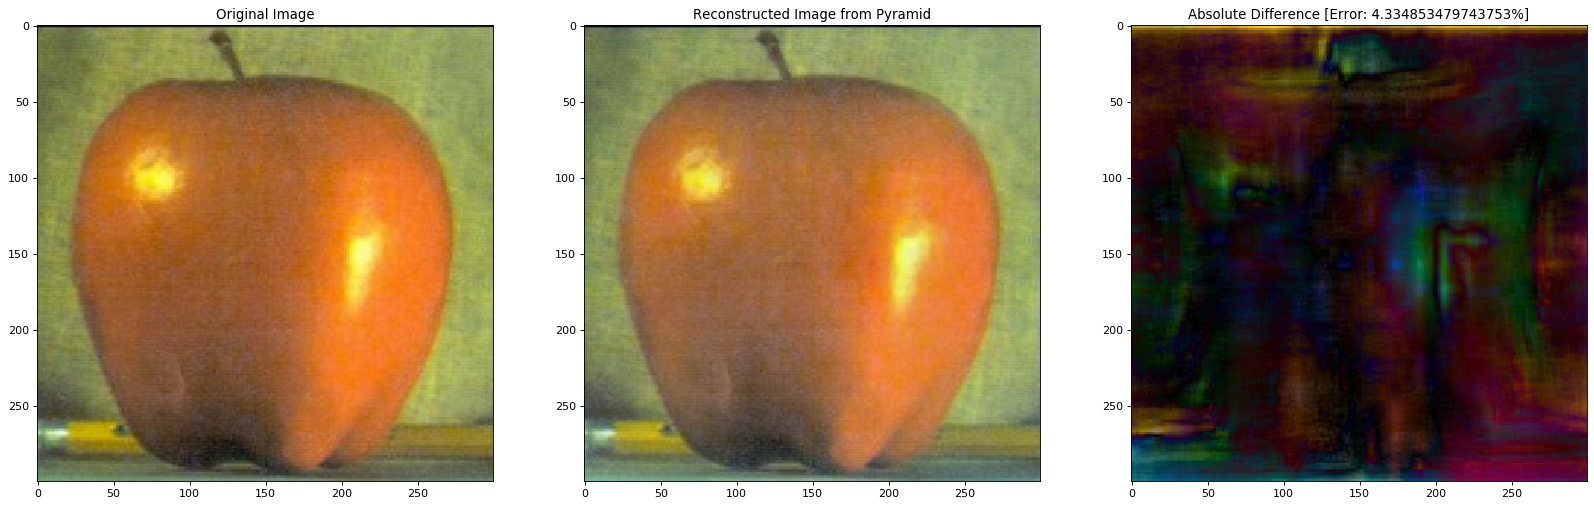

In [23]:
# Test if Pyramids collapse back to original
upPyr = collapsePyr(G_pyr, L_pyr)
img_reconstruct = upPyr[len(upPyr)-1]
diff = cv2.absdiff(G_pyr[0],img_reconstruct)
error = (np.sum(diff)/np.sum(G_pyr[0])) * 100

print(np.sum(diff), np.amin(diff), np.amax(diff))
if debug == 0:
    fig=plt.figure(figsize=(25, 50), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(1,3,1)
    plt.imshow(G_pyr[0])
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(normalize(img_reconstruct))
    plt.title('Reconstructed Image from Pyramid')
    plt.subplot(1,3,3)
    plt.imshow(normalize(diff))
    plt.title('Absolute Difference [Error: '+str(error)+'%]')
    plt.show()

In [102]:
######################################################

########## Section 6.b - Read images, display, and convert to double precision ##########

In [103]:
# Read in Apple and Orange images
I_1 = cv2.imread('./apple.jpeg')
I_2 = cv2.imread('./orange.jpeg')
# Convert to RGB and double precision
I_1 = cv2.cvtColor(I_1,cv2.COLOR_BGR2RGB).astype('float64') / 255
I_2 = cv2.cvtColor(I_2,cv2.COLOR_BGR2RGB).astype('float64') / 255

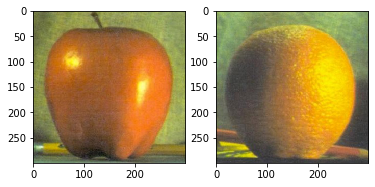

In [104]:
# Display Images
plt.subplot(1, 2, 1)
plt.imshow(I_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(I_2, cmap='gray')
plt.show()

In [105]:
######################################################

########## Section 6.c - Make transition mask ##########

In [106]:
# Generate mask array = size of image array
M = np.zeros((I_1.shape[0], I_1.shape[1], 3)).astype('float64')
# Fill right half of mask with 1, leave left half 0
M[:,M.shape[0]//2:] = 1

In [107]:
######################################################

########## Section 6.d - Direct Blending ##########

In [108]:
# Blend Images using Direct Blending mask
I = (1 - M) * I_1 + M * I_2

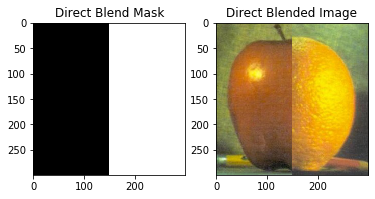

In [109]:
# Display Direct Blended Mask & image
plt.subplot(1,2,1)
plt.imshow(M)
plt.title('Direct Blend Mask')
plt.subplot(1,2,2)
plt.imshow(I)
plt.title('Direct Blended Image')
plt.show()

In [110]:
######################################################

########## Section 6.e - Alpha Blending ##########

In [129]:
# Blur Mask
M_blur = cv2.GaussianBlur(M, (75,75), 0)
# Blend Images using Alpha Blending mask
I_blur = (1 - M_blur) * I_1 + M_blur * I_2

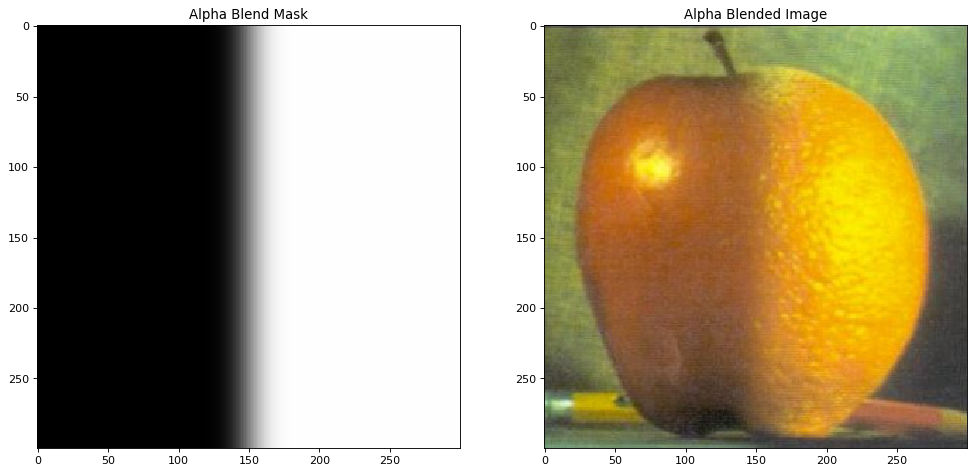

In [132]:
# Display Alpha Blended image
fig=plt.figure(figsize=(15, 30), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.imshow(M_blur)
plt.title('Alpha Blend Mask')
plt.subplot(1,2,2)
plt.imshow(I_blur)
plt.title('Alpha Blended Image')
plt.show()

In [113]:
######################################################

########## Section 6.f - Multiresolution Blending ##########

In [114]:
def multiblend(image1, image2):
    M = np.zeros((I_1.shape[0],I_1.shape[1],3)).astype('float64')
    # Fill right half of mask with 1, leave left half 0
    M[:,M.shape[0]//2:] = 1
    
    # Create Gaussian Pyramid for Mask
    Gpyr_M, Lpyr_M = createPyr(M)
    # Create Laplacian Pyramids for Images
    Gpyr_I1, Lpyr_I1 = createPyr(image1)
    Gpyr_I2, Lpyr_I2 = createPyr(image2)
    
    # Create Laplacian Pyramid for blended image residuals
    l = len(Gpyr_M)
    LS_pyr = []
    for i in range(0,l):
        LS = (1 - Gpyr_M[i]) * Lpyr_I1[i] + Gpyr_M[i] * Lpyr_I2[i]
        LS_pyr.append(LS)
        
    # Perform blend at smallest resolution image   
    im = (1 - Gpyr_M[l-1]) * Gpyr_I1[l-1] + Gpyr_M[l-1] * Gpyr_I2[l-1]
    l = len(LS_pyr)
    # Store as 1 element list to send to collapsePyr
    GS_pyr = [im]
    # Create pyramid of upsampled blended images
    blnd_pyr = collapsePyr(GS_pyr, LS_pyr)
    # Final blended image to return
    blendedimage = blnd_pyr[len(blnd_pyr)-1]

    return blendedimage

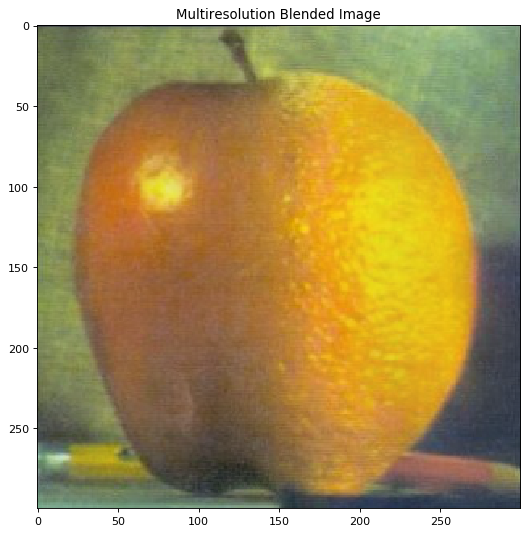

In [138]:
blnd_img = multiblend(I_1, I_2)
if debug == 0:
    fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(normalize(blnd_img))
    plt.title('Multiresolution Blended Image')
    plt.show()